In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt

import context
from ccn import Constraint, ConstraintsGroup
from shapes import Rectangle
from experiment import Experiment

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(device)

cuda


### Define the shapes

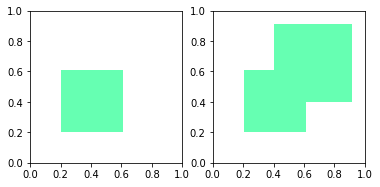

In [2]:
rect0 = Rectangle(0.2, 0.6, 0.2, 0.6)
rect1 = Rectangle(0.4, 0.9, 0.4, 0.9)
combined = rect0 | rect1
shapes = [rect0, combined]

fig, ax = plt.subplots(1, len(shapes))
for i, shape in enumerate(shapes):
  shape.plot(ax[i], full=True)
plt.show()

constraints1 = [ConstraintsGroup([Constraint('1 :- 0')])]
constraints2 = [ConstraintsGroup([Constraint('n0 :- n1')])]

### Define the neural network

In [3]:
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.linear = nn.Sequential(
            nn.Linear(2, 4),
            nn.Tanh(),
            nn.Linear(4, 2),
            nn.Sigmoid()
        )

    def forward(self, x):
        x = self.linear(x)
        return x

model1 = NeuralNetwork()
model2 = NeuralNetwork()
print(model1)

NeuralNetwork(
  (linear): Sequential(
    (0): Linear(in_features=2, out_features=4, bias=True)
    (1): Tanh()
    (2): Linear(in_features=4, out_features=2, bias=True)
    (3): Sigmoid()
  )
)


### Train and test the model

Epoch 1
-------------------------------
loss: 0.643950 [    0/10000]
loss: 0.573145 [ 6400/10000]
Test Error: 
 Accuracy: 84.0%, 61.8%
 Avg loss: 0.008500 

Epoch 2
-------------------------------
loss: 0.492386 [    0/10000]
loss: 0.557020 [ 6400/10000]
Test Error: 
 Accuracy: 84.0%, 58.4%
 Avg loss: 0.008386 

Epoch 3
-------------------------------
loss: 0.494434 [    0/10000]
loss: 0.545947 [ 6400/10000]
Test Error: 
 Accuracy: 84.0%, 62.9%
 Avg loss: 0.007984 

Epoch 4
-------------------------------
loss: 0.479512 [    0/10000]
loss: 0.520641 [ 6400/10000]
Test Error: 
 Accuracy: 84.0%, 68.6%
 Avg loss: 0.007461 

Epoch 5
-------------------------------
loss: 0.451632 [    0/10000]
loss: 0.478013 [ 6400/10000]
Test Error: 
 Accuracy: 84.0%, 78.3%
 Avg loss: 0.006577 

Epoch 6
-------------------------------
loss: 0.392683 [    0/10000]
loss: 0.406797 [ 6400/10000]
Test Error: 
 Accuracy: 90.3%, 86.5%
 Avg loss: 0.005375 

Epoch 7
-------------------------------
loss: 0.314707 [  

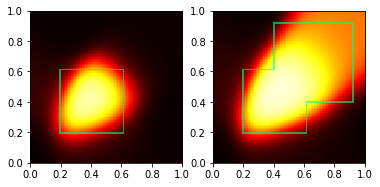

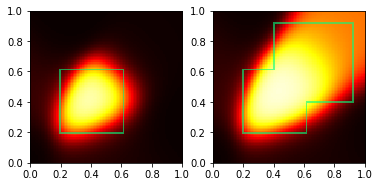

In [4]:
experiment = Experiment('rectangles', model1, shapes, constraints1)
experiment.run(10, device)
#experiment.save(dir='./models/')

In [5]:
experiment = Experiment('rectangles-rev', model2, shapes, constraints2)
experiment.run(50, 'cpu')
#experiment.save(dir='./models/')

Epoch 1
-------------------------------
loss: 0.643570 [    0/10000]
loss: 0.449863 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 57.3%
 Avg loss: 0.008567 

Epoch 2
-------------------------------
loss: 0.532982 [    0/10000]
loss: 0.410065 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 63.1%
 Avg loss: 0.007988 

Epoch 3
-------------------------------
loss: 0.495365 [    0/10000]
loss: 0.394622 [ 6400/10000]
Test Error: 
 Accuracy: 83.7%, 69.0%
 Avg loss: 0.007328 

Epoch 4
-------------------------------
loss: 0.447848 [    0/10000]
loss: 0.346395 [ 6400/10000]
Test Error: 
 Accuracy: 84.6%, 77.8%
 Avg loss: 0.006005 

Epoch 5
-------------------------------
loss: 0.360058 [    0/10000]
loss: 0.285429 [ 6400/10000]
Test Error: 
 Accuracy: 88.7%, 81.2%
 Avg loss: 0.005289 

Epoch 6
-------------------------------
loss: 0.313948 [    0/10000]
loss: 0.255177 [ 6400/10000]
Test Error: 
 Accuracy: 90.4%, 83.5%
 Avg loss: 0.004856 

Epoch 7
-------------------------------
loss: 0.289770 [  